# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

# Load Data

In [2]:
df =pd.read_csv('bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


# Information About Data

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


### Statistical information

In [4]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


### Check Duplication Value

In [5]:
df.duplicated().values.any()

False

### Check Missing Values

In [6]:
df.isnull().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

In [7]:
# count of season
df['season'].value_counts()

Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: season, dtype: int64

In [8]:
# most frequent value
df['season'].mode()[0]

'Winter'

In [9]:
# fill missing values with most frequent value
df['season'] = df['season'].fillna(df['season'].mode()[0])

In [10]:
df['holiday'].value_counts()

0.0    9738
1.0     292
Name: holiday, dtype: int64

In [11]:
df['holiday'].mode()[0]

0.0

In [12]:
df['holiday'] = df['holiday'].fillna(df['holiday'].mode()[0])

In [13]:
df['workingday'].value_counts()

1.0    6367
0.0    3021
Name: workingday, dtype: int64

In [14]:
df['workingday'].mode()[0]

1.0

In [15]:
df['workingday'] = df['workingday'].fillna(df['workingday'].mode()[0])

In [16]:
df['weather'].value_counts()

Clear    5793
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64

In [17]:
df['weather'].mode()[0]

'Clear'

In [18]:
df['weather'] = df['weather'].fillna(df['weather'].mode()[0])

In [19]:
df['temp'].describe()

count    8104.000000
mean       20.317665
std         7.818568
min         0.820000
25%        13.940000
50%        20.500000
75%        26.240000
max        41.000000
Name: temp, dtype: float64

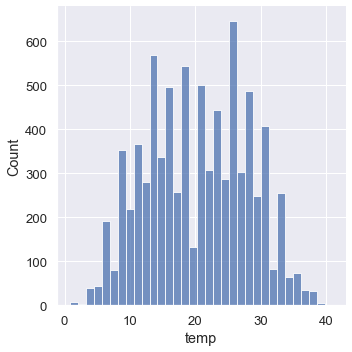

In [20]:
# visualize Distribution of temp
sns.displot(df['temp'])

<AxesSubplot:xlabel='temp'>

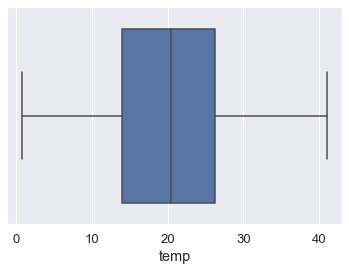

In [21]:
# visualize outliers
sns.boxplot(df['temp'])

In [22]:
df['temp'] = df['temp'].fillna(df['temp'].mean())

In [23]:
df['humidity'].describe()

count    7462.000000
mean       61.790673
std        19.262084
min         0.000000
25%        47.000000
50%        62.000000
75%        77.000000
max       100.000000
Name: humidity, dtype: float64

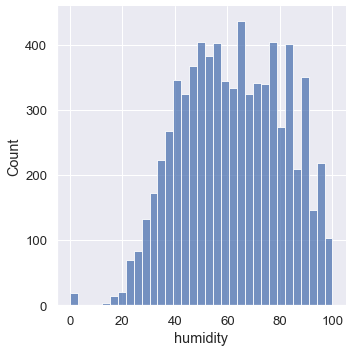

In [24]:
sns.displot(df['humidity'])

<AxesSubplot:xlabel='humidity'>

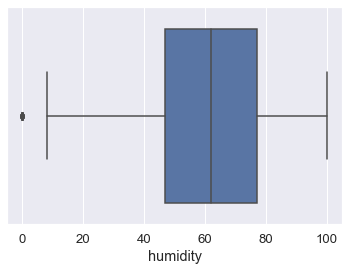

In [25]:
sns.boxplot(df['humidity'])

In [26]:
df[df['humidity']<1]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
1091,2011-03-10 00:00:00,Spring,0.0,1.0,Rainy,13.940000,0.0,16.9979,3,0,3
1093,2011-03-10 02:00:00,Spring,0.0,1.0,Rainy,13.940000,0.0,16.9979,0,1,1
1094,2011-03-10 05:00:00,Spring,0.0,1.0,Rainy,20.317665,0.0,NaN,1,2,3
1095,2011-03-10 06:00:00,Spring,0.0,1.0,Rainy,14.760000,0.0,NaN,0,12,12
1096,2011-03-10 07:00:00,Winter,0.0,1.0,Rainy,15.580000,0.0,15.0013,1,36,37
1097,2011-03-10 08:00:00,Spring,0.0,1.0,Rainy,20.317665,0.0,NaN,1,43,44
1098,2011-03-10 09:00:00,Spring,0.0,1.0,Clear,20.317665,0.0,15.0013,1,23,24
1099,2011-03-10 10:00:00,Spring,0.0,1.0,Rainy,16.400000,0.0,11.0014,0,17,17
1100,2011-03-10 11:00:00,Spring,0.0,1.0,Rainy,16.400000,0.0,16.9979,6,5,11
1101,2011-03-10 12:00:00,Spring,0.0,1.0,Rainy,20.317665,0.0,NaN,4,30,34


In [27]:
df[df['humidity']>=1]['humidity'].mean()

61.94840790004031

In [28]:
# filter outliers with mean of data which doesn't have outliers
df['humidity'] = df['humidity'].apply(lambda x: df[df['humidity']>=1]['humidity'].mean() if x < 1 else x)

<AxesSubplot:xlabel='humidity'>

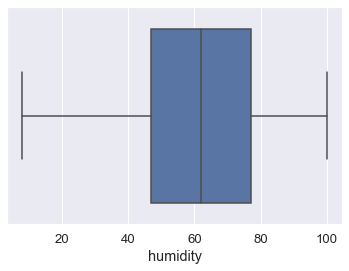

In [29]:
sns.boxplot(df['humidity'])

In [30]:
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())

In [31]:
df['windspeed'].describe()

count    6820.000000
mean       12.708806
std         8.131154
min         0.000000
25%         7.001500
50%        12.998000
75%        16.997900
max        56.996900
Name: windspeed, dtype: float64

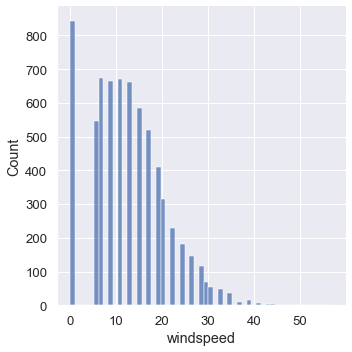

In [32]:
sns.displot(df['windspeed'])

<AxesSubplot:xlabel='windspeed'>

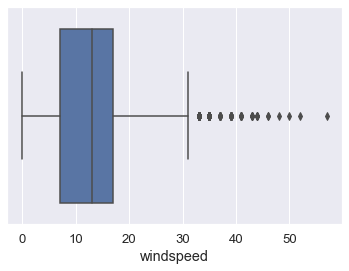

In [33]:
sns.boxplot(df['windspeed'])

In [34]:
df['windspeed'] = df['windspeed'].apply(lambda x: df[df['windspeed']<= 30]['windspeed'].mean() if x > 30 else x)

<AxesSubplot:xlabel='windspeed'>

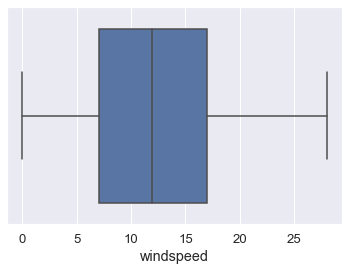

In [35]:
sns.boxplot(df['windspeed'])

In [36]:
df['windspeed'].describe()

count    6820.000000
mean       11.904669
std         6.972797
min         0.000000
25%         7.001500
50%        11.904669
75%        16.997900
max        27.999300
Name: windspeed, dtype: float64

In [37]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

In [38]:
df.isnull().values.any()

False

In [39]:
df.duplicated().values.any()

False

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10886 non-null  object 
 2   holiday             10886 non-null  float64
 3   workingday          10886 non-null  float64
 4   weather             10886 non-null  object 
 5   temp                10886 non-null  float64
 6   humidity            10886 non-null  float64
 7   windspeed           10886 non-null  float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [41]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.026823,0.722488,20.317665,61.948408,11.904669,36.021955,155.552177,191.574132
std,0.161575,0.447792,6.745838,15.736432,5.518908,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,16.400000,54.000000,8.998100,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.317665,61.948408,11.904669,17.000000,118.000000,145.000000
75%,0.000000,1.000000,24.600000,70.000000,12.998000,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,27.999300,367.000000,886.000000,977.000000


In [42]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.840000,81.000000,11.904669,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,Clear,9.020000,80.000000,0.000000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.020000,61.948408,0.000000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.840000,75.000000,0.000000,3,10,13
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,20.317665,75.000000,11.904669,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.580000,50.000000,26.002700,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,Clear,14.760000,61.948408,11.904669,10,231,241
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.940000,61.000000,15.001300,4,164,168
10884,2012-12-19 22:00:00,Winter,0.0,1.0,Clear,13.940000,61.948408,6.003200,12,117,129


In [43]:
# convert datetime into time type
df['datetime'] = pd.to_datetime(df['datetime'])

In [44]:
# make feature engineering and extract good information
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

In [45]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,hour,day,month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.840000,81.000000,11.904669,3,13,16,0,Saturday,January
1,2011-01-01 01:00:00,Spring,0.0,0.0,Clear,9.020000,80.000000,0.000000,8,32,40,1,Saturday,January
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.020000,61.948408,0.000000,5,27,32,2,Saturday,January
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.840000,75.000000,0.000000,3,10,13,3,Saturday,January
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,20.317665,75.000000,11.904669,0,1,1,4,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.580000,50.000000,26.002700,7,329,336,19,Wednesday,December
10882,2012-12-19 20:00:00,Winter,0.0,1.0,Clear,14.760000,61.948408,11.904669,10,231,241,20,Wednesday,December
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.940000,61.000000,15.001300,4,164,168,21,Wednesday,December
10884,2012-12-19 22:00:00,Winter,0.0,1.0,Clear,13.940000,61.948408,6.003200,12,117,129,22,Wednesday,December


<AxesSubplot:>

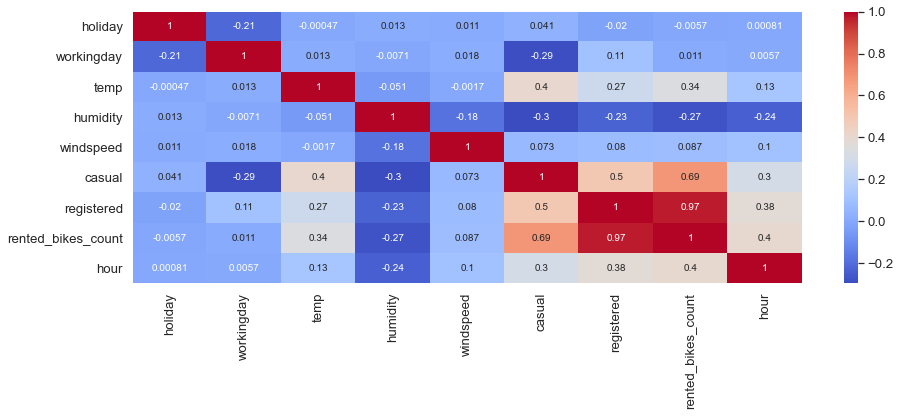

In [46]:
# correlation between data and target
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [47]:
# Remove unnecessary columns
df.drop(columns=['datetime', 'casual', 'registered', 'holiday', 'workingday', 'season', 'windspeed'], inplace=True)

In [48]:
df.head()

,weather,temp,humidity,rented_bikes_count,hour,day,month
0,Clear,9.840000,81.000000,16,0,Saturday,January
1,Clear,9.020000,80.000000,40,1,Saturday,January
2,Clear,9.020000,61.948408,32,2,Saturday,January
3,Clear,9.840000,75.000000,13,3,Saturday,January
4,Clear,20.317665,75.000000,1,4,Saturday,January


Text(0.5, 1.0, 'Distribution of rented_bikes_count')

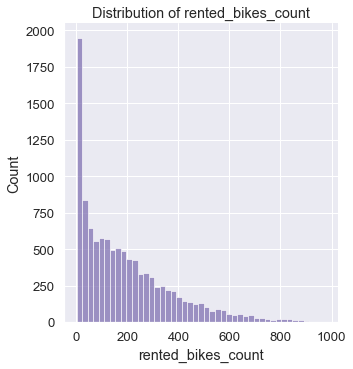

In [49]:
sns.displot(df['rented_bikes_count'], color='m')
plt.title('Distribution of rented_bikes_count')

### Viualization numaric features with target feature

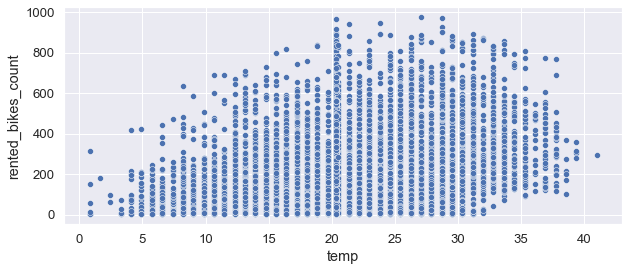

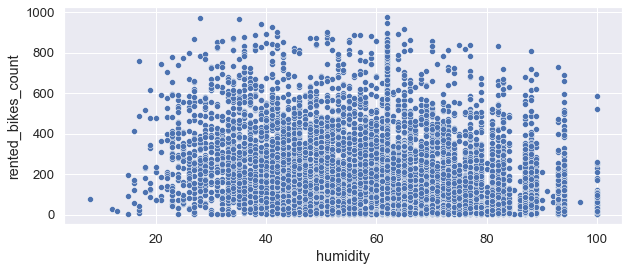

In [50]:
for col in df[['temp', 'humidity']]:
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=df[col], y=df['rented_bikes_count'])
    plt.show()

### Viualization categories features with target feature

month 

June         912
May          912
December     912
August       912
July         912
October      911
November     911
April        909
September    909
March        901
February     901
January      884
Name: month, dtype: int64 



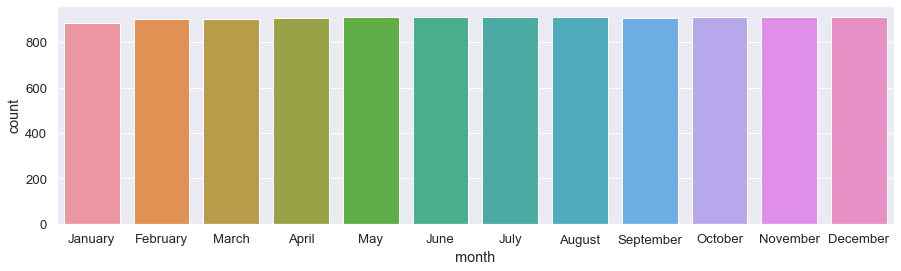

weather 

Clear    7933
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64 



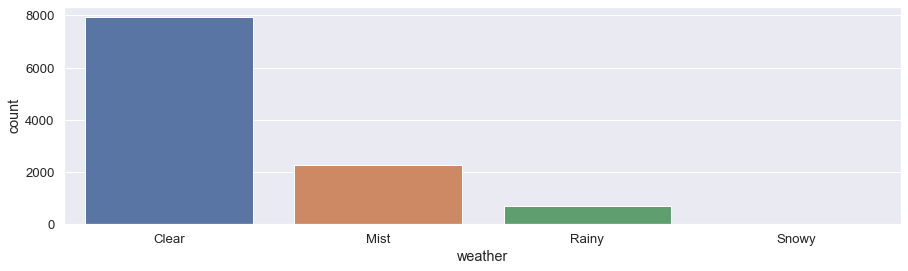

hour 

23    456
20    456
16    456
15    456
17    456
22    456
14    456
18    456
21    456
19    456
13    456
12    456
7     455
6     455
0     455
8     455
11    455
10    455
9     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64 



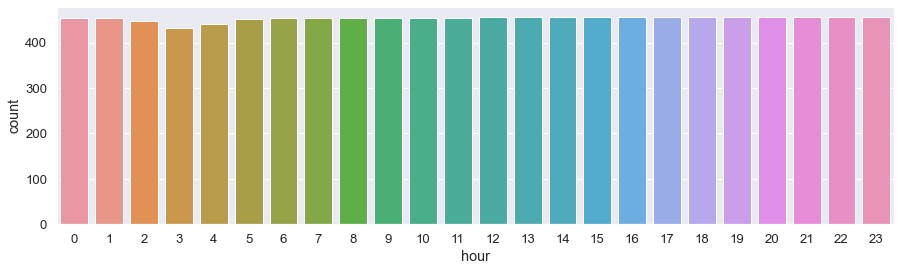

day 

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day, dtype: int64 



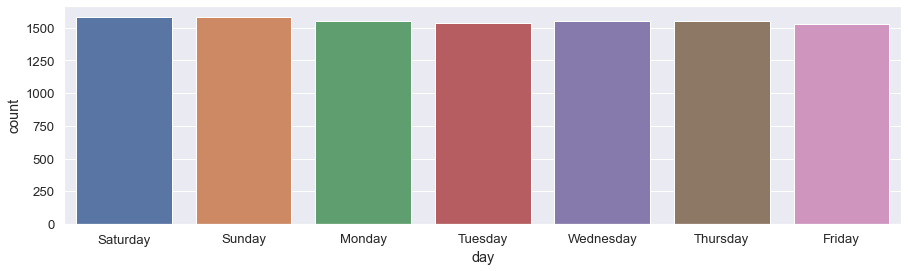

In [51]:
for col in df[['month', 'weather', 'hour', 'day']]:    
    print(col, '\n')
    plt.figure(figsize=(15,4))
    print(df[col].value_counts(), '\n')
    sns.countplot(df[col])
    plt.show()

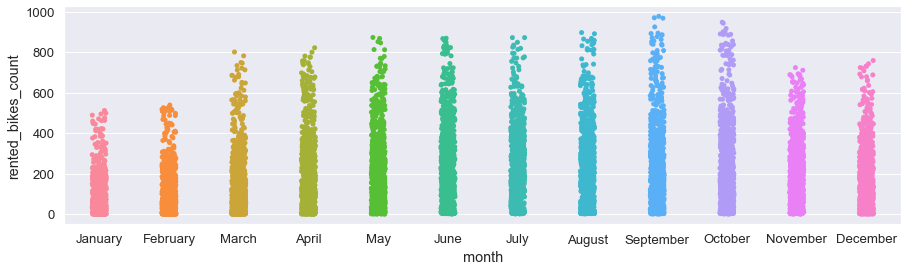

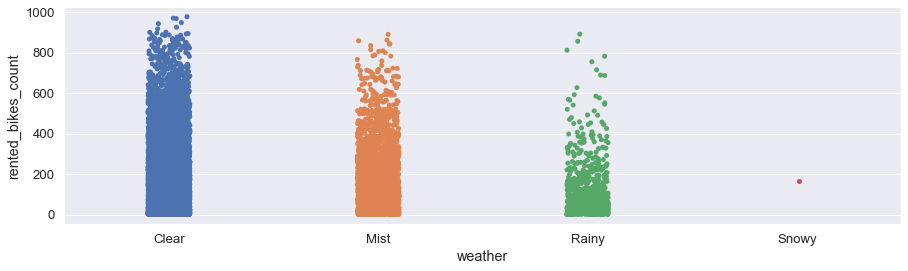

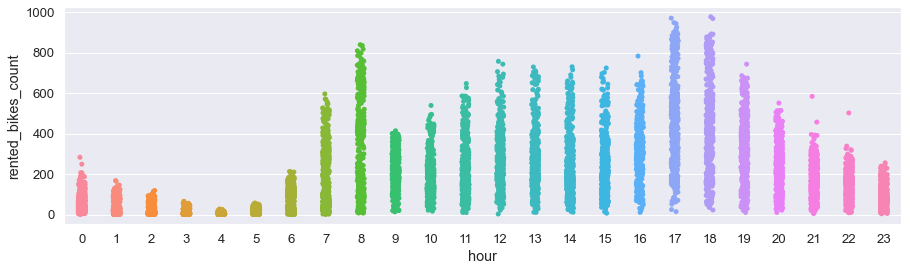

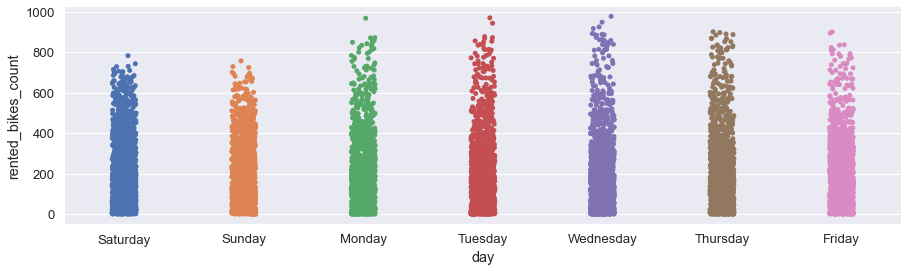

In [52]:
for col in df[['month', 'weather', 'hour', 'day']]:    
    plt.figure(figsize=(15,4))
    sns.stripplot(x=df[col], y=df['rented_bikes_count'])
    plt.show()

In [53]:
df.head()

,weather,temp,humidity,rented_bikes_count,hour,day,month
0,Clear,9.840000,81.000000,16,0,Saturday,January
1,Clear,9.020000,80.000000,40,1,Saturday,January
2,Clear,9.020000,61.948408,32,2,Saturday,January
3,Clear,9.840000,75.000000,13,3,Saturday,January
4,Clear,20.317665,75.000000,1,4,Saturday,January


### Encoding data to train it

In [54]:
df = pd.get_dummies(df, drop_first=True)

In [55]:
df

,temp,humidity,rented_bikes_count,hour,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,9.840000,81.000000,16,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,9.020000,80.000000,40,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,9.020000,61.948408,32,2,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,9.840000,75.000000,13,3,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,20.317665,75.000000,1,4,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.580000,50.000000,336,19,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10882,14.760000,61.948408,241,20,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10883,13.940000,61.000000,168,21,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10884,13.940000,61.948408,129,22,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Split datat to build model machine learning

In [56]:
x = df.drop('rented_bikes_count', axis=1) 
y = df['rented_bikes_count']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=170)

### Feature scaling to make features have same range

In [58]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Build more than model and select the high performence technique

In [59]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [60]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.3038868643005084
Test Score: 0.3302198852526078
------------------------------
Using model: DT
Training Score: 0.9974478638283064
Test Score: 0.6550642263690338
------------------------------
Using model: RF
Training Score: 0.9700763287267776
Test Score: 0.819628691848943
------------------------------
Using model: XGBR
Training Score: 0.91464624326327
Test Score: 0.8449272939511392
------------------------------
Using model: KNNR
Training Score: 0.6704623019362072
Test Score: 0.48342139822273567
------------------------------
Using model: SVR
Training Score: 0.1846317712616703
Test Score: 0.20637694848047206


### Choose XGBOOST to build web application...

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=170)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

xgb = XGBRegressor(n_estimators=200, max_depth=5)
xgb.fit(x_train, y_train)
print(f'Training Score: {xgb.score(x_train, y_train)}')

y_pred = xgb.predict(x_test)
print(f'Test Score: {xgb.score(x_test,y_test)}')  

Training Score: 0.9127913106005994
Test Score: 0.8453061442405809


# Save model and scaler to use them in deployment phase

In [62]:
import joblib

In [63]:
# joblib.dump(xgb, 'model.h5')

In [64]:
# joblib.dump(scaler, 'scaler.h5')

In [65]:
x.columns

Index(['temp', 'humidity', 'hour', 'weather_Mist', 'weather_Rainy',
       'weather_Snowy', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [66]:
len(x.columns)

23